# Лабораторная работа № 2.  Санников Алексей. 15-АС.   

# Цель работы - получение навыков работы с методами классификации.

# Вариант № 22.

# Glass.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

from sklearn import datasets
from sklearn.linear_model import perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from matplotlib.pylab import rc, plot

df = pd.read_csv(r'glass.csv', sep=',')


# 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Информация об атрибутах таблицы:

Идентификационный номер: от 1 до 214 (удален из CSV-файла)

RI: показатель преломления

Na: натрий (единичное измерение: процент веса в соответствующей окиси, как атрибуты 4-10)

Мг: Магния

Ал: Алюминий

Си: Кремний

К: Калий

Ca: Кальций

Ба: Барий

Фе: Утюг

Тип стекла: (атрибуты класса) 
1. термообработанное строительное стекло
2. нетермообработанное строительное стекло
3. термообработанное автомобильное стекло
4. нетермообработанное строительное стекло (нет в базе данных)
5. контейнеров 
6. посуда 
7. фары

In [52]:
df.shape

(214, 10)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [54]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(213, 10)

In [55]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

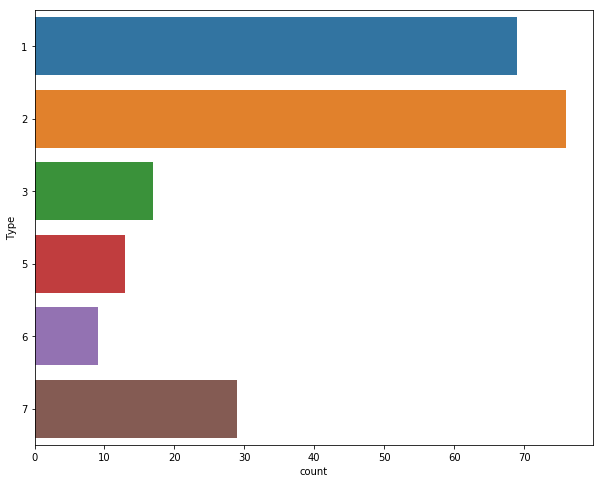

In [56]:
sns.countplot(data=df, y='Type')
plt.show()

Вывод: признаки не сбалансированы, следовательно необходимо использовать ROC-кривую, так как она дает адекватную оценку качества работы алгоритма, где классы несбалансированы и их размеры выборки отличаются друг от друга несущественно.

# 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования.

Выделим количественные и категориальные признаки:

In [57]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
categorial:  []


In [58]:
df['Type'] = df['Type'].apply(lambda x: str(x))

#заново выделим категориальные и числовые
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
categorial:  ['Type']


In [59]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


Построим BoxPlot:

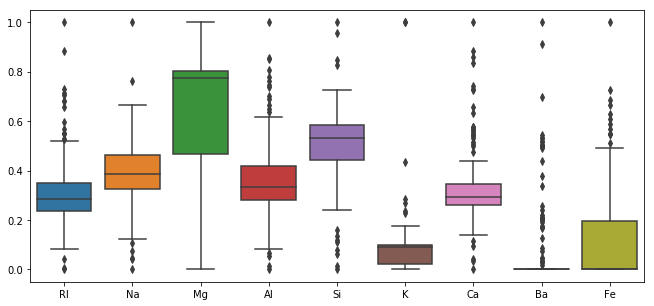

In [60]:
plt.figure(figsize=(11,5))
sns.boxplot(data=df[numerical_columns])
plt.show()

# 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

Выявлен один категориальнй признак - Type. Его числовое значение соответствует названию, но он уже представлен количественным. Кроме Type категориальных признаков нет, следовательно замена не требуется в виду отсутствия категориальных признаков.

# 6.	Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

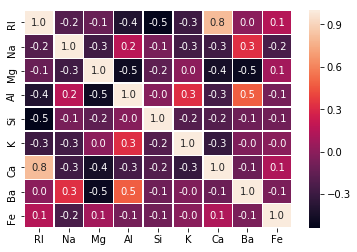

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.000000,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.000000,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.000000,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.000000,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.000000,1
5,0.211150,0.309774,0.804009,0.414330,0.564286,0.103060,0.245353,0.000000,0.509804,1
6,0.275680,0.386466,0.801782,0.264798,0.585714,0.093398,0.254647,0.000000,0.000000,1
7,0.281387,0.363910,0.804009,0.236760,0.612500,0.091787,0.261152,0.000000,0.000000,1
8,0.352502,0.497744,0.797327,0.336449,0.405357,0.090177,0.266729,0.000000,0.000000,1
9,0.280948,0.341353,0.801782,0.333333,0.567857,0.091787,0.276022,0.000000,0.215686,1


In [61]:
corr=df
sns.heatmap(df.corr(), annot = True, fmt='.1f', linewidths=.5)
plt.show()
corr


In [62]:
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.000000,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.000000,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.000000,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.000000,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.000000,1
5,0.211150,0.309774,0.804009,0.414330,0.564286,0.103060,0.245353,0.000000,0.509804,1
6,0.275680,0.386466,0.801782,0.264798,0.585714,0.093398,0.254647,0.000000,0.000000,1
7,0.281387,0.363910,0.804009,0.236760,0.612500,0.091787,0.261152,0.000000,0.000000,1
8,0.352502,0.497744,0.797327,0.336449,0.405357,0.090177,0.266729,0.000000,0.000000,1
9,0.280948,0.341353,0.801782,0.333333,0.567857,0.091787,0.276022,0.000000,0.215686,1


Наблюдается сильная отрицательная зависимость между параметрами. Большинство значений лежат в промежутках от 0 до 0,5 и от -0,5 до 0, что характеризует слабую линейную (местами отрицательную) зависимость.

# 7.	Заполните пропущенные значения в данных;

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
RI      213 non-null float64
Na      213 non-null float64
Mg      213 non-null float64
Al      213 non-null float64
Si      213 non-null float64
K       213 non-null float64
Ca      213 non-null float64
Ba      213 non-null float64
Fe      213 non-null float64
Type    213 non-null object
dtypes: float64(9), object(1)
memory usage: 28.3+ KB


Пропусков значений в даных нет.

# 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества)

Клиссификаторы 1 (К ближайших соседей- радиусный) и 4 (линейный - персептрон)

In [3]:
# разделим полученные данные на данные для обучения и теста
X, y = df.drop('Type', axis=1), df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

print(X_train.shape)
print(X_test.shape)

(149, 9)
(65, 9)


Радиусный К ближайших соседей:

In [4]:
# найдем оптимальный радиус для классификатора ближайших соседей
rnc = RadiusNeighborsClassifier(outlier_label=1)

params = {'radius': np.arange(0, 2, 0.1)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

best_radius = rnc_grid.best_estimator_.radius
best_score = rnc_grid.best_score_
print('best train score:', best_score, '\t at radius:', best_radius)

rnc = RadiusNeighborsClassifier(outlier_label=7, radius=best_radius)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('test score: ', best_score)

best train score: 0.5704697986577181 	 at radius: 1.8
test score:  0.584615384615


Линейный классификатор - персептрон

In [5]:
slf = sk.linear_model.Perceptron()
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,2,20)[1:],n_iter=[int(50)]), n_jobs=int(10))
paramsearch.fit(X_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
print('best score=',best_score,'at alpha',selected_alpha)
best_n_iter = paramsearch.best_estimator_.n_iter
best_n_jobs = paramsearch.best_estimator_.n_jobs

dtc = sk.linear_model.Perceptron(alpha=selected_alpha,n_iter=best_n_iter,n_jobs=best_n_jobs)
dtc.fit(X_train, y_train)
test_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', test_score)


best score= 0.30201342281879195 at alpha 0.105263157895
test score:  0.538461538462


Для построения ROC и PR кривых необходимо получить вероятности принадлежности примера к одному из классов, а затем варьировать границу выбора класса. Вероятности можно получить с помощью метода predict_proba

In [6]:
class CustomClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, X_test, X_train, y_train):
        '''
        Общее описание.
         Определяет вероятность того, что тестовый экземпляр соответствует классу.
        
         Алгоритм.
         Мы пройдем нулевой радиус до радиуса двойного классификатора
         с элементарным шагом (dr). Если экземпляр находится вдоль:
         * Zero raduis + dr - соответствует 100%
         * Классификатор raduis + dr - соответствует 50%
         * Двойной классификатор raduis + dr и за его пределами - соответствует 0%
         Имеются промежуточные значения процентов. Каждый шаг соответствует своему
         собственному процентному(от всей величины) значению. Если предсказанный экземпляр меняет
         класс, этот экземпляр принадлежит текущему радиусу.
        
        '''
        runs = 25
        dr = (2*self.radius/runs)
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(y_test),2), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_temp.fit(X_train, y_train).predict(X_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_tmp.fit(X_train, y_train).predict(X_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

In [7]:
# ROC
plt.figure(figsize=(10,8))
mrnc = CustomClassifier(outlier_label=7, radius=best_radius)
probas_mrnc0 = mrnc.predict_proba(X_test, X_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,1], probas_mrnc0[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, y_train).predict_proba(X_test)
tpr, fpr, thresholds = roc_curve(y_test[:,1], probas_dtc0[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Type 1')
plt.show()

ValueError: Can only tuple-index with a MultiIndex

In [8]:
# PR
plt.figure(figsize=(10,8))
precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_mrnc1[:,1])
aps_mrnc1 = average_precision_score(y_test[:,1],probas_mrnc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 

precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test[:,1],probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

ValueError: Can only tuple-index with a MultiIndex

# 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Была решена задача классификации двумя классификаторами: радиусным к ближайших соседей и линейным. Точность классификации в первом случае составила 58%, во втором 53%. Проценты получились низкими, так как параметры задачи являются несбалансированными. 
ROC и PR кривые не имеют графической интерпретации, т. к. в задаче используются мультииндексы. Для получения данных кривых необходимо применить dummy-кодирование, подразумевающее разбиение исходного класса на N новых самоятоятельных классов, однако данный способ приведет к необъективной оценки классификации, которая станет равной 100%.